   # <center> This notebook will walk you through how to perform importance sampling using XPSI


```markdown
# Performing Importance Sampling with X-PSI

Importance sampling can be performed using X-PSI under the following circumstances:

1. # Model Update:  
   - The model itself has changed, which implies a modification of the likelihood function.

2. # Change in Parameter Priors:  
   - The prior for one or more parameters has been modified.  
   - However, the new priors must still lie within the hypervolume of the original prior distribution.

3. # Both Changes:  
   - Both the prior and the model have been updated simultaneously.
```

# <center>  1. Model Update

In the Module forder, we made a file called : main_IS_likelihood.py where we change the num_energies  in the likelihood class from 64 to 256      
This implies that our model has changed and the likelihood computation is more accurate 

In [1]:
import math
import xpsi
from xpsi.Sample import importance
from xpsi.global_imports import gravradius

from collections import OrderedDict

/=============================================\
| X-PSI: X-ray Pulse Simulation and Inference |
|---------------------------------------------|
|                Version: 2.2.7               |
|---------------------------------------------|
|      https://xpsi-group.github.io/xpsi      |
\=============================================/

Check your emcee installation.
Check your installation of emcee if using the EnsembleSampler
Check your PyMultiNest installation.
Check your installation of PyMultiNest if using the NestedSampler
Check your UltraNest installation.
Check your installation of UltraNest if using the UltranestSampler
Imported GetDist version: 1.5.3
Imported nestcheck version: 0.2.1


In [2]:
# Let's import the old and the new models
from Modules import main as old_model
from Modules import main_IS_likelihood as new_model

Setting channels for event data...
Channels set.
Setting channels for loaded instrument response (sub)matrix...
Channels set.
No parameters supplied... empty subspace created.
Creating parameter:
    > Named "phase_shift" with fixed value 0.000e+00.
    > The phase shift for the signal, a periodic parameter [cycles].
Creating parameter:
    > Named "frequency" with fixed value 3.140e+02.
    > Spin frequency [Hz].
Creating parameter:
    > Named "mass" with bounds [1.000e+00, 1.600e+00].
    > Gravitational mass [solar masses].
Creating parameter:
    > Named "radius" with bounds [1.000e+01, 1.300e+01].
    > Coordinate equatorial radius [km].
Creating parameter:
    > Named "distance" with bounds [5.000e-01, 2.000e+00].
    > Earth distance [kpc].
Creating parameter:
    > Named "cos_inclination" with bounds [0.000e+00, 1.000e+00].
    > Cosine of Earth inclination to rotation axis.
Creating parameter:
    > Named "super_colatitude" with bounds [1.000e-03, 1.570e+00].
    > The colati

In [3]:
# Just me doing some lazy things with Serena script
def derive_names(model):
    out = str(model.likelihood)
    outA = out.split('\n')
    outA = outA[2:-1]
    names = []
    for i in range(len(outA)):
        a = outA[i]
        ind_end = a.find(':')
        if a[:ind_end].find(' ')<0:
            names.append(a[:ind_end])
    return names

names = derive_names(old_model)

In [4]:
names

['mass',
 'radius',
 'distance',
 'cos_inclination',
 'hot__phase_shift',
 'hot__super_colatitude',
 'hot__super_radius',
 'hot__super_temperature']

In [5]:
# Doing importance Sampling

#####################

# Warning: Running this cell might take a while.
# It take 1min to run on 504 core. On a single core, it'll take a few hours
# So not a good idea to run it on your laptop


######################
# importance(new_model.likelihood,
#                   old_model.likelihood,
#                   'Outputs/ST_live_1000_eff_0.3_seed42',
#                   names = names,
#                   likelihood_change = True,
#                   prior_change = False,
#                   weight_threshold=1.0e-30,
#                   overwrite=True)

In [6]:
# Running the cell above will generate a file called, ST_live_1000_eff_0.3_seed42__importance_sampled.txt
# that contains the new posteriors

In [7]:
# Now let's plot what the new posteriors looks like compared to the old ones

In [8]:
# Settings names, bounds and labels
old_model.names=['mass','radius','distance','cos_inclination','hot__phase_shift',
          'hot__super_colatitude','hot__super_radius','hot__super_temperature']

# We will use the same bounds used during sampling
old_model.bounds = {'mass':(1.0,1.6),
             'radius':(10,13),
             'distance':(0.5,2.0),
             'cos_inclination':(0,1),
             'hot__phase_shift':(-0.25, 0.75),
             'hot__super_colatitude':(0.001, math.pi/2 - 0.001),
             'hot__super_radius':(0.001, math.pi/2.0 - 0.001),
             'hot__super_temperature':(6., 7.)}

# Now the labels
old_model.labels = {'mass': r"M\;\mathrm{[M}_{\odot}\mathrm{]}",
              'radius': r"R_{\mathrm{eq}}\;\mathrm{[km]}",
              'distance': r"D \;\mathrm{[kpc]}",
              'cos_inclination': r"\cos(i)",
              'hot__phase_shift': r"\phi_{p}\;\mathrm{[cycles]}",
              'hot__super_colatitude': r"\Theta_{spot}\;\mathrm{[rad]}",
              'hot__super_radius': r"\zeta_{spot}\;\mathrm{[rad]}",
              'hot__super_temperature': r"\mathrm{log10}(T_{spot}\;[\mathrm{K}])"}

old_model.names +=['compactness']
old_model.bounds['compactness']=(gravradius(1.0)/16.0, 1.0/3.0)
old_model.labels['compactness']= r"M/R_{\mathrm{eq}}"



In [9]:
new_model.names = old_model.names
new_model.bounds = old_model.bounds
new_model.labels = old_model.labels

In [13]:
getdist_kde_settings = {'ignore_rows': 0,
                         'min_weight_ratio': 1.0e-10,
                         'contours': [0.683, 0.954, 0.997],
                         'credible_interval_threshold': 0.001,
                         'range_ND_contour': 0,
                         'range_confidence': 0.001,
                         'fine_bins': 1024,
                         'smooth_scale_1D': 0.4,
                         'num_bins': 100,
                         'boundary_correction_order': 1,
                         'mult_bias_correction_order': 1,
                         'smooth_scale_2D': 0.4,
                         'max_corr_2D': 0.99,
                         'fine_bins_2D': 512,
                         'num_bins_2D': 40}

old_model.runs = xpsi.Runs.load_runs(ID='Old model',
                               run_IDs=['run'],
                               roots=['ST_live_1000_eff_0.3_seed42'],
                               base_dirs=['Outputs/'],
                               use_nestcheck=[False],
                               kde_settings=getdist_kde_settings,
                               likelihood=old_model.likelihood,
                               names=old_model.names,
                               bounds=old_model.bounds,
                               labels=old_model.labels,
                               implementation='multinest',
                               overwrite_transformed=True)

new_model.runs = xpsi.Runs.load_runs(ID='New model',
                               run_IDs=['run'],
                               roots=['ST_live_1000_eff_0.3_seed42__importance_sampled'],
                               base_dirs=['Outputs/'],
                               use_nestcheck=[False],
                               kde_settings=getdist_kde_settings,
                               likelihood=new_model.likelihood,
                               names=new_model.names,
                               bounds=new_model.bounds,
                               labels=new_model.labels,
                               implementation='multinest',
                               overwrite_transformed=True)


In [14]:
pp = xpsi.PostProcessing.CornerPlotter([old_model.runs, new_model.runs])

Executing posterior density estimation...
Curating set of runs for posterior plotting...
Run set curated.
Constructing lower-triangle posterior density plot via Gaussian KDE:
plotting:  ['mass', 'radius']
plotting:  ['mass', 'distance']
plotting:  ['mass', 'cos_inclination']
plotting:  ['mass', 'hot__phase_shift']
plotting:  ['mass', 'hot__super_colatitude']
plotting:  ['mass', 'hot__super_radius']
plotting:  ['mass', 'hot__super_temperature']
plotting:  ['mass', 'compactness']
plotting:  ['radius', 'distance']
plotting:  ['radius', 'cos_inclination']
plotting:  ['radius', 'hot__phase_shift']
plotting:  ['radius', 'hot__super_colatitude']
plotting:  ['radius', 'hot__super_radius']
plotting:  ['radius', 'hot__super_temperature']
plotting:  ['radius', 'compactness']
plotting:  ['distance', 'cos_inclination']
plotting:  ['distance', 'hot__phase_shift']
plotting:  ['distance', 'hot__super_colatitude']
plotting:  ['distance', 'hot__super_radius']
plotting:  ['distance', 'hot__super_temperat

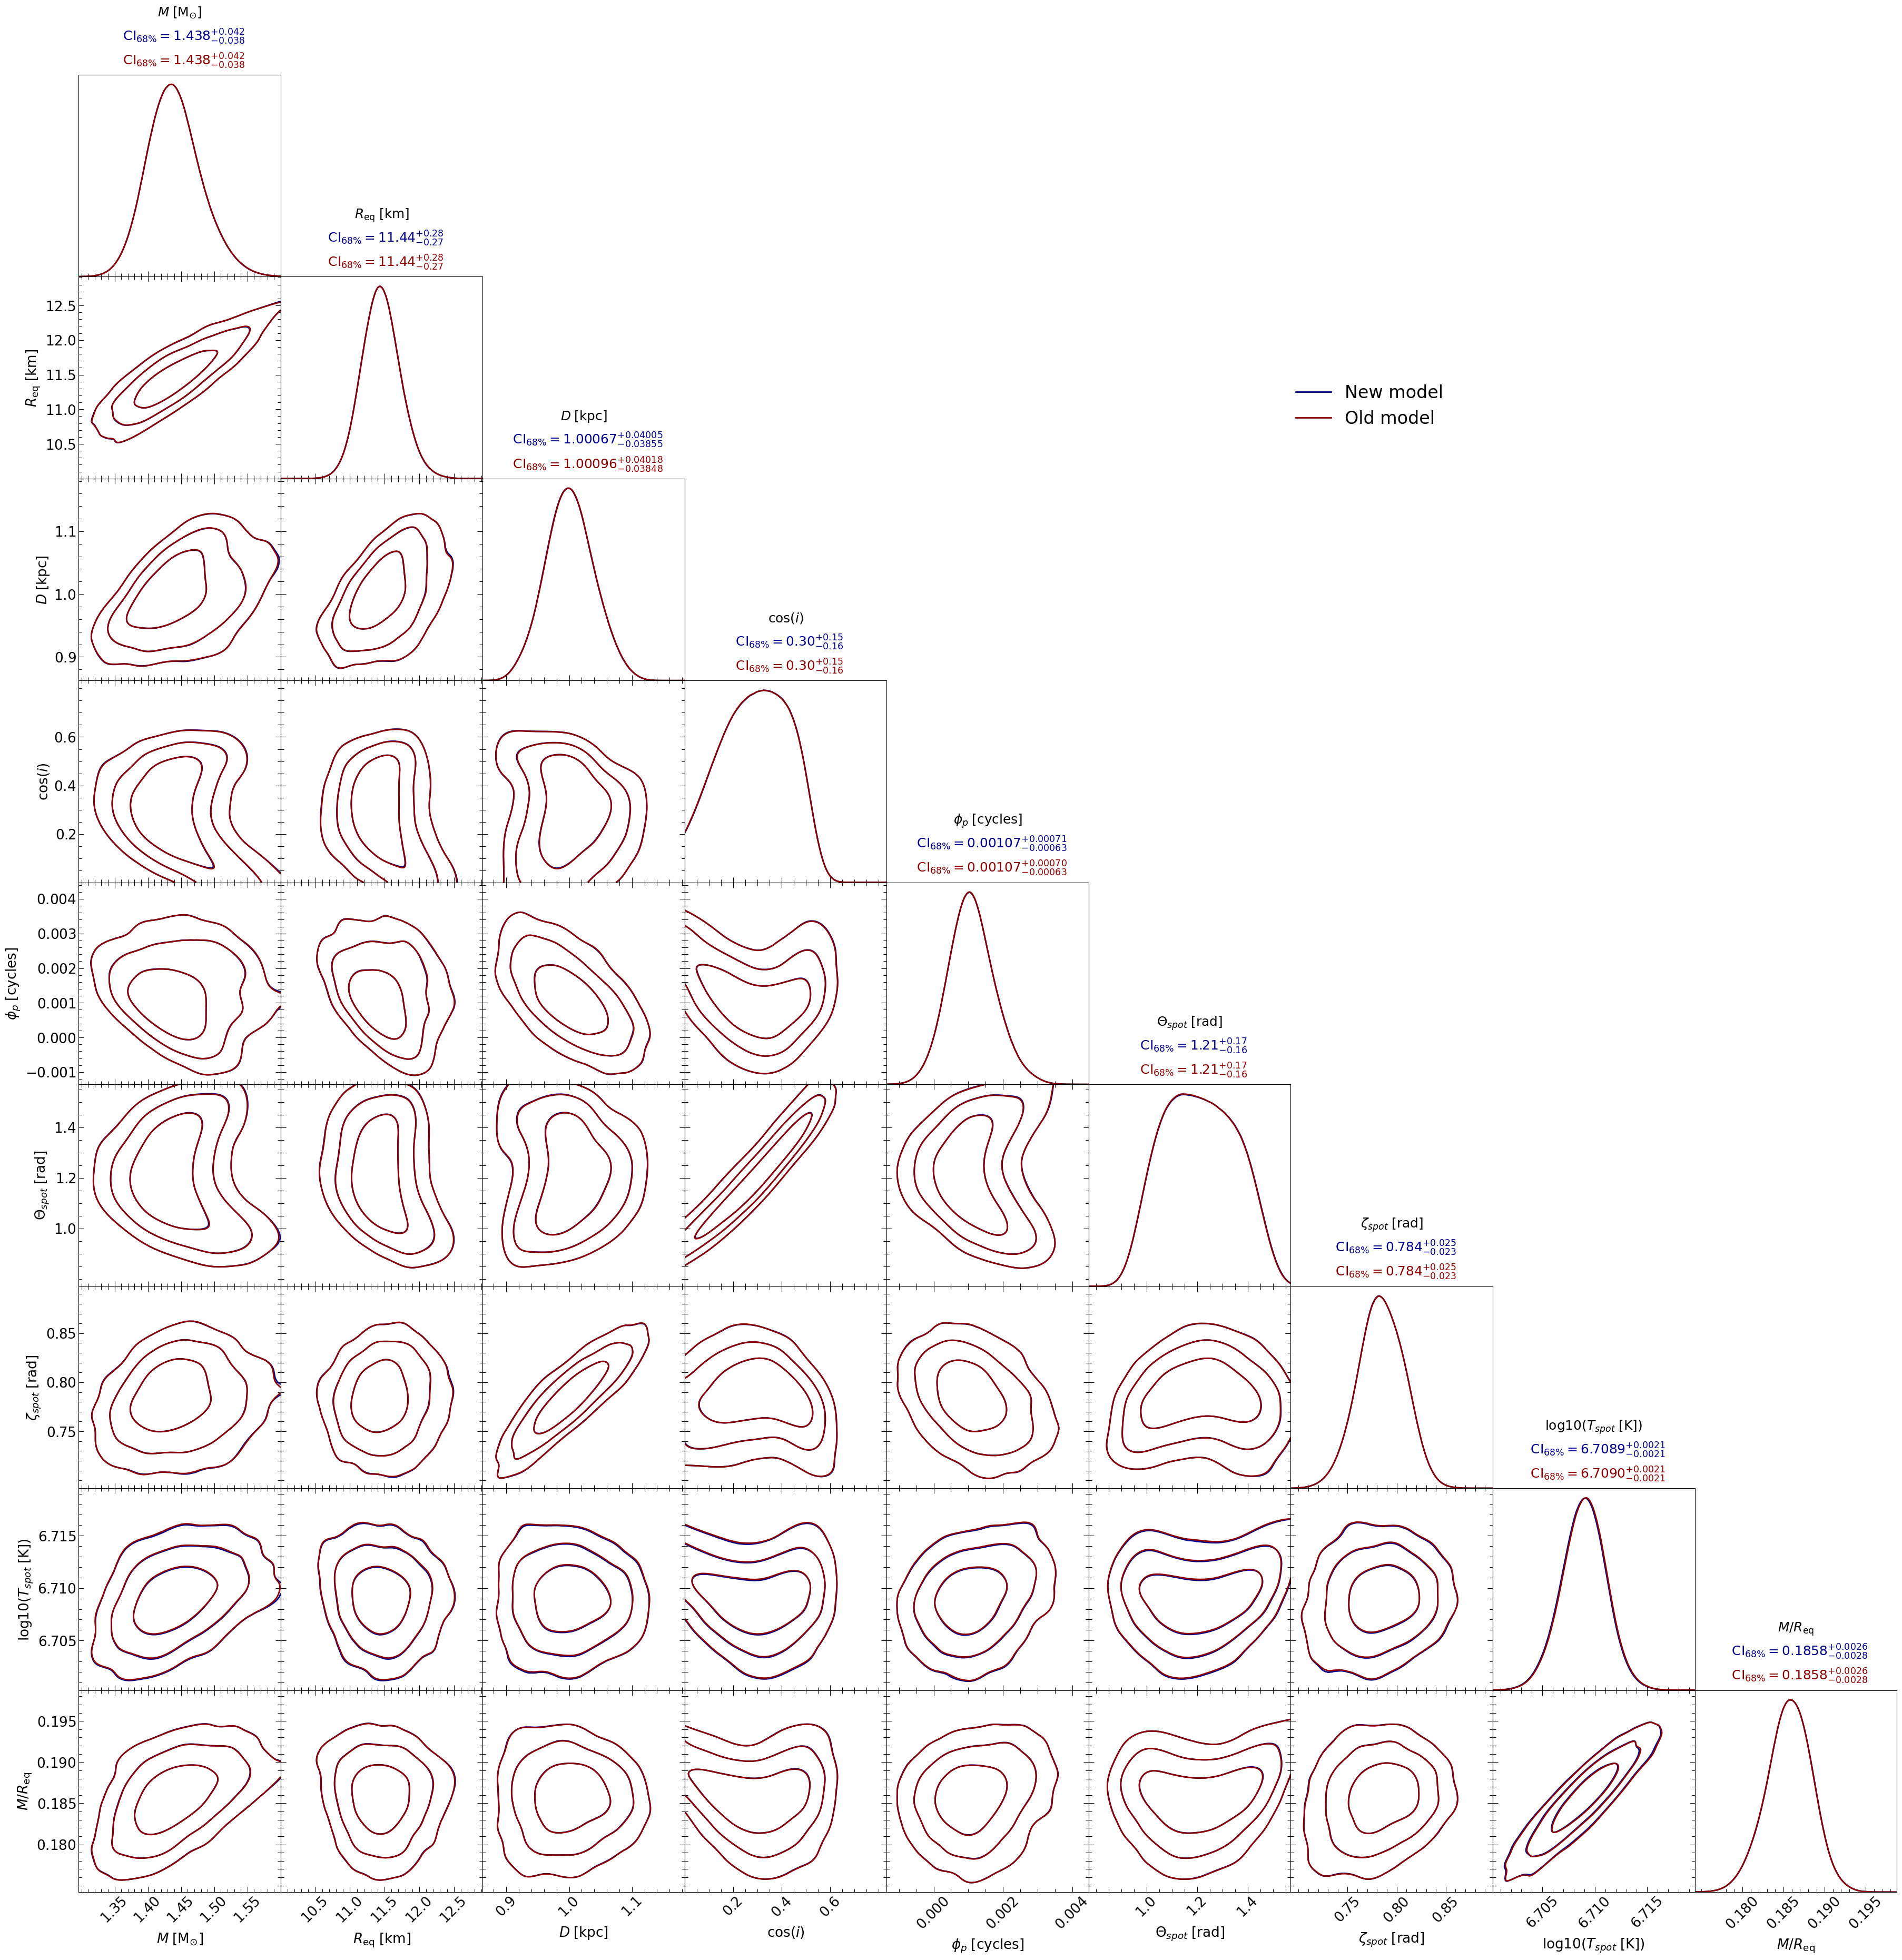

In [16]:
_ = pp.plot(
     params=old_model.names,#["mass","radius"],
    
     IDs=OrderedDict([('Old model', ['run',]),('New model', ['run',])]),
     prior_density=False,
     KL_divergence=True,
     ndraws=5e4,
     combine=False, combine_all=True, only_combined=False, overwrite_combined=True,
     param_plot_lims={},
     bootstrap_estimators=False,
     bootstrap_density=False,
     n_simulate=200,
     crosshairs=False,
     write=False,
     ext='.png',
     maxdots=3000,
     root_filename='run',
     credible_interval_1d=True,
     annotate_credible_interval=True,
     credible_interval_1d_all_show=True,
     show_vband=None,
     compute_all_intervals=False,
     sixtyeight=True,
     axis_tick_x_rotation=45.0,
     num_plot_contours=3,
     subplot_size=4.0,
     legend_corner_coords=(0.675,0.8),
     legend_frameon=False,
     scale_attrs=OrderedDict([('legend_fontsize', 2.0),
                              ('axes_labelsize', 1.35),
                              ('axes_fontsize', 'axes_labelsize'),
                             ]
                            ),
     colormap='Reds',
     shaded=False,
     shade_root_index=-1,
     rasterized_shade=True,
     no_ylabel=True,
     no_ytick=True,
     lw=2.0,
     lw_1d=2.0,
     filled=False,
     normalize=True,
     veneer=True,
     #contour_colors=['orange'],
     tqdm_kwargs={'disable': False},
     lengthen=2.0,
     embolden=1.0,
     nx=500)


# <center>  2. Prior Update

In the Module forder, we made a file called : main_IS_prior.py.
The model is the same but the only thing that changed is the Prior. In the CustomPrior_IS, the mass prior changed (look density method) to $M \sim U(1., 1.6)$ to $M \sim N(1.4, 0.01^2)$. The radius also changed from $R_{eq} \sim U(10., 13.)$ to $R_{eq} \sim N(12., 0.01^2)$.

In [18]:
from Modules import main_IS_prior as new_model

Setting channels for event data...
Channels set.
Setting channels for loaded instrument response (sub)matrix...
Channels set.
No parameters supplied... empty subspace created.
Creating parameter:
    > Named "phase_shift" with fixed value 0.000e+00.
    > The phase shift for the signal, a periodic parameter [cycles].
Creating parameter:
    > Named "frequency" with fixed value 3.140e+02.
    > Spin frequency [Hz].
Creating parameter:
    > Named "mass" with bounds [1.000e+00, 1.600e+00].
    > Gravitational mass [solar masses].
Creating parameter:
    > Named "radius" with bounds [1.000e+01, 1.300e+01].
    > Coordinate equatorial radius [km].
Creating parameter:
    > Named "distance" with bounds [5.000e-01, 2.000e+00].
    > Earth distance [kpc].
Creating parameter:
    > Named "cos_inclination" with bounds [0.000e+00, 1.000e+00].
    > Cosine of Earth inclination to rotation axis.
Creating parameter:
    > Named "super_colatitude" with bounds [1.000e-03, 1.570e+00].
    > The colati

In [21]:
new_model.names = old_model.names
new_model.bounds = old_model.bounds
new_model.labels = old_model.labels

In [24]:
old_model.runs = xpsi.Runs.load_runs(ID='Old model',
                               run_IDs=['run'],
                               roots=['ST_live_1000_eff_0.3_seed42'],
                               base_dirs=['Outputs/'],
                               use_nestcheck=[False],
                               kde_settings=getdist_kde_settings,
                               likelihood=old_model.likelihood,
                               names=old_model.names,
                               bounds=old_model.bounds,
                               labels=old_model.labels,
                               implementation='multinest',
                               overwrite_transformed=True)

new_model.runs = xpsi.Runs.load_runs(ID='New model',
                               run_IDs=['run'],
                               roots=['ST_live_1000_eff_0.3_seed42__importance_sampled'],
                               base_dirs=['Outputs/'],
                               use_nestcheck=[False],
                               kde_settings=getdist_kde_settings,
                               likelihood=new_model.likelihood,
                               names=new_model.names,
                               bounds=new_model.bounds,
                               labels=new_model.labels,
                               implementation='multinest',
                               overwrite_transformed=True)

ValueError: zero-size array to reduction operation minimum which has no identity

Executing posterior density estimation...
Curating set of runs for posterior plotting...
Run set curated.
Constructing lower-triangle posterior density plot via Gaussian KDE:
plotting:  ['mass', 'radius']
plotting:  ['mass', 'distance']
plotting:  ['mass', 'cos_inclination']
plotting:  ['mass', 'hot__phase_shift']
plotting:  ['mass', 'hot__super_colatitude']
plotting:  ['mass', 'hot__super_radius']
plotting:  ['mass', 'hot__super_temperature']
plotting:  ['mass', 'compactness']
plotting:  ['radius', 'distance']
plotting:  ['radius', 'cos_inclination']
plotting:  ['radius', 'hot__phase_shift']
plotting:  ['radius', 'hot__super_colatitude']
plotting:  ['radius', 'hot__super_radius']
plotting:  ['radius', 'hot__super_temperature']
plotting:  ['radius', 'compactness']
plotting:  ['distance', 'cos_inclination']
plotting:  ['distance', 'hot__phase_shift']
plotting:  ['distance', 'hot__super_colatitude']
plotting:  ['distance', 'hot__super_radius']
plotting:  ['distance', 'hot__super_temperat

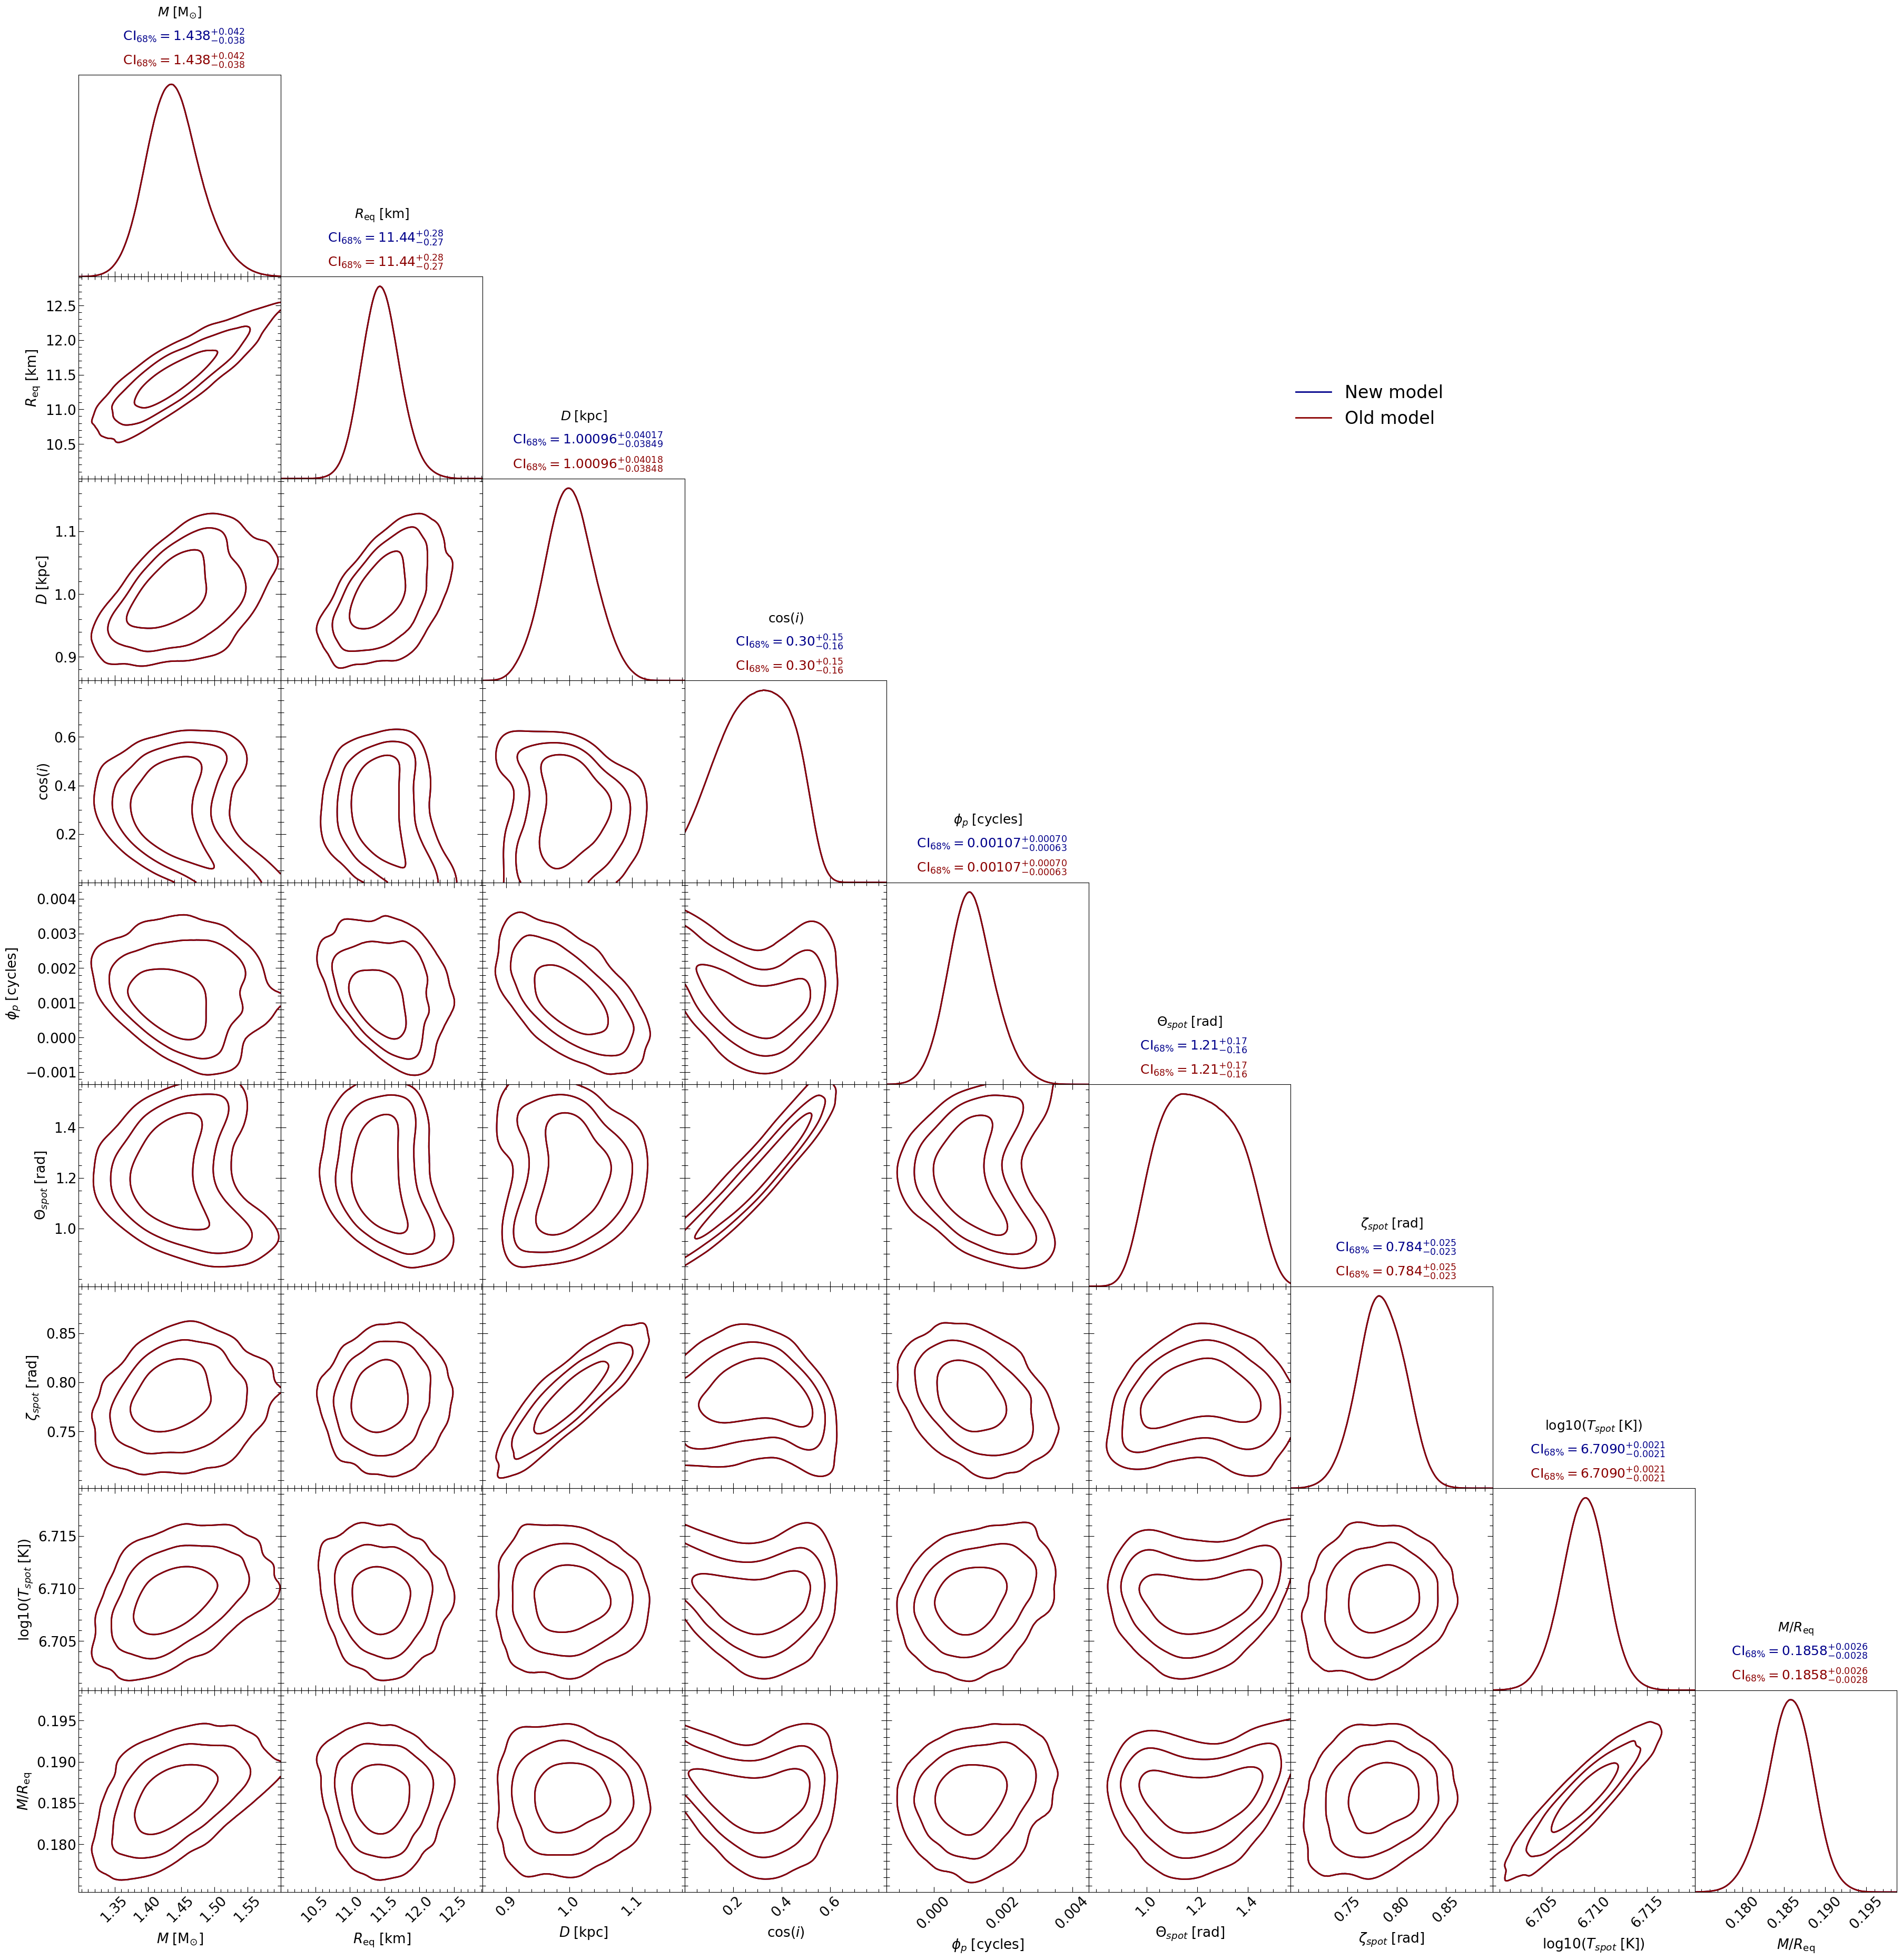

In [23]:
pp = xpsi.PostProcessing.CornerPlotter([old_model.runs, new_model.runs])

_ = pp.plot(
     params=old_model.names,#["mass","radius"],
    
     IDs=OrderedDict([('Old model', ['run',]),('New model', ['run',])]),
     prior_density=False,
     KL_divergence=True,
     ndraws=5e4,
     combine=False, combine_all=True, only_combined=False, overwrite_combined=True,
     param_plot_lims={},
     bootstrap_estimators=False,
     bootstrap_density=False,
     n_simulate=200,
     crosshairs=False,
     write=False,
     ext='.png',
     maxdots=3000,
     root_filename='run',
     credible_interval_1d=True,
     annotate_credible_interval=True,
     credible_interval_1d_all_show=True,
     show_vband=None,
     compute_all_intervals=False,
     sixtyeight=True,
     axis_tick_x_rotation=45.0,
     num_plot_contours=3,
     subplot_size=4.0,
     legend_corner_coords=(0.675,0.8),
     legend_frameon=False,
     scale_attrs=OrderedDict([('legend_fontsize', 2.0),
                              ('axes_labelsize', 1.35),
                              ('axes_fontsize', 'axes_labelsize'),
                             ]
                            ),
     colormap='Reds',
     shaded=False,
     shade_root_index=-1,
     rasterized_shade=True,
     no_ylabel=True,
     no_ytick=True,
     lw=2.0,
     lw_1d=2.0,
     filled=False,
     normalize=True,
     veneer=True,
     #contour_colors=['orange'],
     tqdm_kwargs={'disable': False},
     lengthen=2.0,
     embolden=1.0,
     nx=500)
